In [100]:
from Process_Classes import  information
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report ,r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve,f1_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
df = information("data/","hmelq.csv")

Class object initialized


In [3]:
df.get_inf(True,"drop")

hmelq.csv is loaded
3576
2018


,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


Columns names with object type are saved in .catlist if you want to turn them into dummies use cattodummy


In [4]:
df.cattodummy()

Looking for: ['reason', 'job']
Adding columns:  ['reason_DebtCon', 'reason_HomeImp']
Adding columns:  ['job_Mgr', 'job_Office', 'job_Other', 'job_ProfEx', 'job_Sales', 'job_Self']
Dummies entered as .catdata


,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,0,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,0,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,0,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,0,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [5]:
y,X= df.choose_your_y("bad")

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [6]:
X = X.drop("reason_HomeImp",axis=1)

In [7]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)
cart_model

DecisionTreeClassifier()

In [73]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9372937293729373

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       554
           1       0.68      0.52      0.59        52

    accuracy                           0.94       606
   macro avg       0.82      0.75      0.78       606
weighted avg       0.93      0.94      0.93       606



In [14]:
cart_grdi = {"max_depth": range(1,10),
            "min_samples_split": list(range(2,50)),
            "criterion":['gini', 'entropy']}

In [105]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grdi, cv=10, n_jobs=-1, verbose=2,scoring='f1')
cart_cv_model = cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4800 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 8593 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   21.6s finished


In [106]:
print("En iyi parametlerler: " + str(cart_cv_model.best_params_))

En iyi parametlerler: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}


In [86]:
cart = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 8, min_samples_split=2)
cart_tuned = cart.fit(X_train,y_train)

In [87]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.9438943894389439

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       554
           1       0.78      0.48      0.60        52

    accuracy                           0.94       606
   macro avg       0.87      0.73      0.78       606
weighted avg       0.94      0.94      0.94       606



In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [92]:
y_pred = rf_model.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       554
           1       1.00      0.42      0.59        52

    accuracy                           0.95       606
   macro avg       0.97      0.71      0.78       606
weighted avg       0.95      0.95      0.94       606



In [116]:
rf_params = {"max_depth": [8,10,11,13,15,18],
            "max_features": [5,10,15,20],
             "n_estimators": [5,10,50,100,200,500],
             "min_samples_split": [3,5,10],
            "criterion":['entropy']}

In [117]:
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs=-1,verbose=2,scoring='f1')

In [118]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1117 tasks      | elapsed: 631.1min
[Parallel(n_jobs=-1)]: Done 1650 tasks      | elapsed: 632.3min
[Parallel(n_jobs=-1)]: Done 2177 tasks      | elapsed: 633.6min
[Parallel(n_jobs=-1)]: Done 2786 tasks      | elapsed: 635.2min
[Parallel(n_jobs=-1)]: Done 3596 tasks      | elapsed: 636.9min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 638.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [8, 10, 11, 13, 15, 18],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [5, 10, 50, 100, 200, 500]},
             scoring='f1', verbose=2)

In [119]:
rf_cv_model.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 15,
 'min_samples_split': 10,
 'n_estimators': 10}

In [120]:
rf_tuned = RandomForestClassifier(max_depth=13,max_features=15,min_samples_split=10, n_estimators=10,criterion='entropy')

In [121]:
rf_tuned.fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       554
           1       0.96      0.50      0.66        52

    accuracy                           0.96       606
   macro avg       0.96      0.75      0.82       606
weighted avg       0.96      0.96      0.95       606



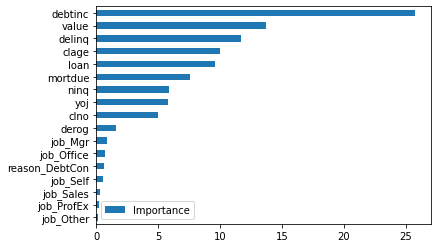

In [125]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=True)[0:20].plot(kind="barh")

In [126]:
good_cat = list(importance.sort_values(by= "Importance", axis=0,ascending=False)[0:10].T.columns)

In [127]:
X = X[good_cat]

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [136]:
X.head()

,debtinc,value,delinq,clage,loan,mortdue,ninq,yoj,clno,derog
153,36.056,136877.0,0.0,168.96,18200,94727.0,2.0,15.0,26.0,0.0
154,38.079,96784.0,0.0,64.51,21700,79240.0,6.0,5.0,24.0,0.0
155,42.459,36486.0,2.0,196.01,34100,241931.0,3.0,1.0,50.0,0.0
156,29.200,76718.0,2.0,131.47,8400,62989.0,0.0,3.0,22.0,0.0
157,27.108,43684.0,0.0,95.36,17400,25859.0,1.0,16.0,17.0,1.0


In [129]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)

In [130]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)
y_pred = mlp_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       428
           1       0.00      0.00      0.00       178

    accuracy                           0.71       606
   macro avg       0.35      0.50      0.41       606
weighted avg       0.50      0.71      0.58       606



In [180]:
mlpc_params = {
    'alpha':[0.1,0.01,0.001,0.005,0.0001,0.00001],
    'hidden_layer_sizes': [(10,10,10),(45,50,60),(25,35,45),(15,15)],
    'solver': ['lbfgs','adam','sgd'],
    'activation': ['relu','logistic','tanh','identity']  
}

In [181]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,cv =10 , n_jobs=-1,verbose = 2,scoring='f1_weighted')
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1021 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1993 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  5.4min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'identity'],
                         'alpha': [0.1, 0.01, 0.001, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (45, 50, 60),
                                                (25, 35, 45), (15, 15)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             scoring='f1_weighted', verbose=2)

In [189]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (10, 10, 10),
 'solver': 'lbfgs'}

In [190]:
mlpc_tuned = MLPClassifier(activation='relu',alpha=0.1,hidden_layer_sizes= (10,10,10),solver='lbfgs')

In [191]:
mlpc_tuned.fit(X_train_scaled,y_train)
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7062706270627063

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       428
           1       0.00      0.00      0.00       178

    accuracy                           0.71       606
   macro avg       0.35      0.50      0.41       606
weighted avg       0.50      0.71      0.58       606



In [193]:
confusion_matrix(y_test,y_pred)

array([[428,   0],
       [178,   0]], dtype=int64)

In [194]:
y,X= df.choose_your_y("bad")

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [195]:
X = X.drop("reason_HomeImp",axis=1)

In [196]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [199]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)
y_pred = mlp_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       554
           1       0.79      0.52      0.63        52

    accuracy                           0.95       606
   macro avg       0.88      0.75      0.80       606
weighted avg       0.94      0.95      0.94       606



In [201]:
mlpc_params = {
    'alpha':[0.1,0.01,0.001,0.005,0.0001,0.00001],
    'hidden_layer_sizes': [(10,10,10),(100,100),(100,100,100),(15,15),(30,30),(100)],
    'solver': ['lbfgs','adam','sgd'],
    'activation': ['relu','logistic','tanh','identity']  
}

In [202]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,cv =10 , n_jobs=-1,verbose = 2,scoring='f1')
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 26.5min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'identity'],
                         'alpha': [0.1, 0.01, 0.001, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100),
                                                (100, 100, 100), (15, 15),
                                                (30, 30), 100],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             scoring='f1', verbose=2)

In [203]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (30, 30),
 'solver': 'lbfgs'}

In [204]:
mlpc_tuned = MLPClassifier(activation='relu',alpha=0.1,hidden_layer_sizes= (30,30),solver='lbfgs')

In [206]:
mlpc_tuned.fit(X_train_scaled,y_train)
y_pred=mlpc_tuned.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       554
           1       0.79      0.60      0.68        52

    accuracy                           0.95       606
   macro avg       0.88      0.79      0.83       606
weighted avg       0.95      0.95      0.95       606



In [208]:
from Process_Classes import data_classification

ImportError: cannot import name 'data_classification' from 'Process_Classes' (C:\Projects\Python\Kodluyoruz\Hw\assignment-BerkeAtalay\Process_Classes.py)